<a href="https://colab.research.google.com/github/TanmayN22/Machine_learning_freeCodeCamp/blob/main/Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [7]:
cols = ["fLenght", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [8]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [9]:
#since our computer cant understand letters well but understands numbers well we convert this g and h to 0 and 1

In [10]:
df["class"] = (df["class"] == "g").astype(int)

In [11]:
df.head()

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


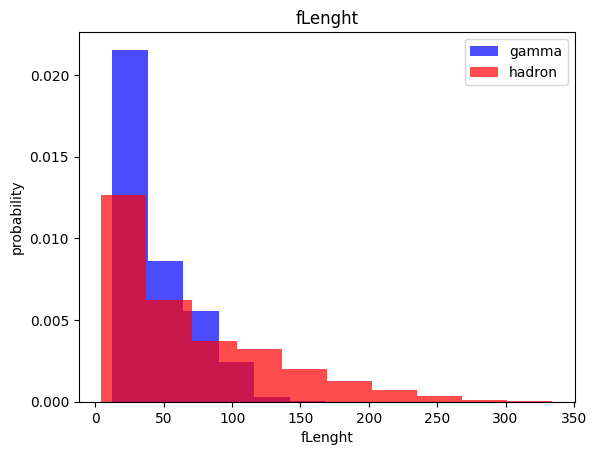

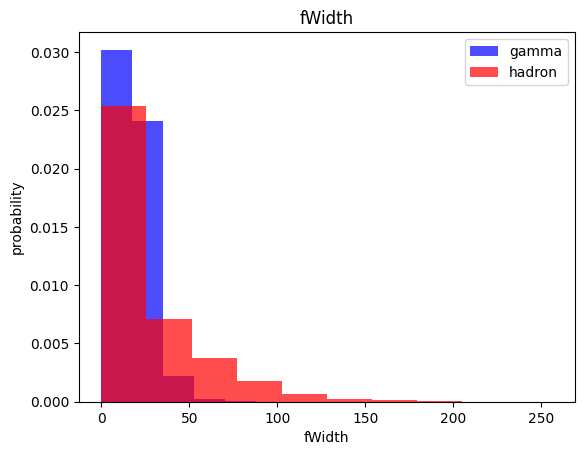

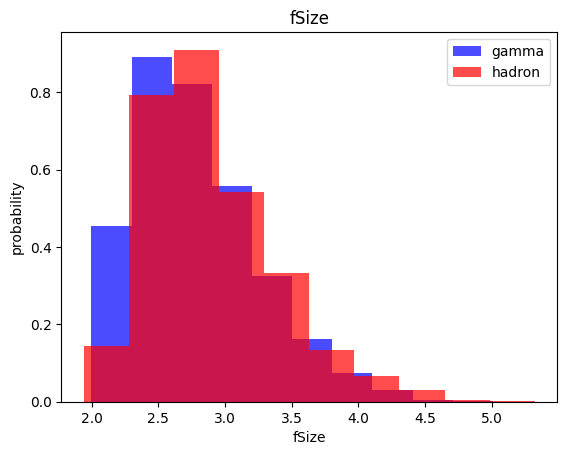

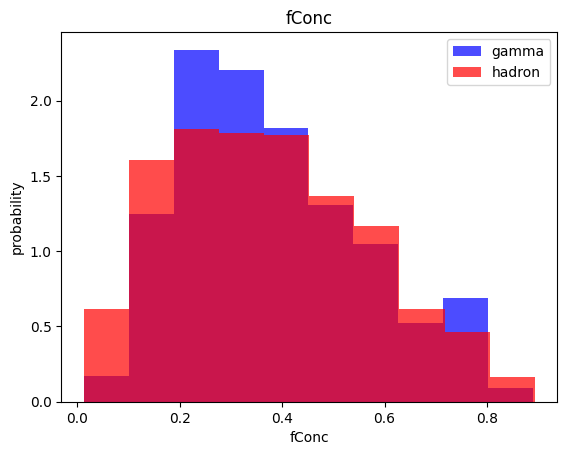

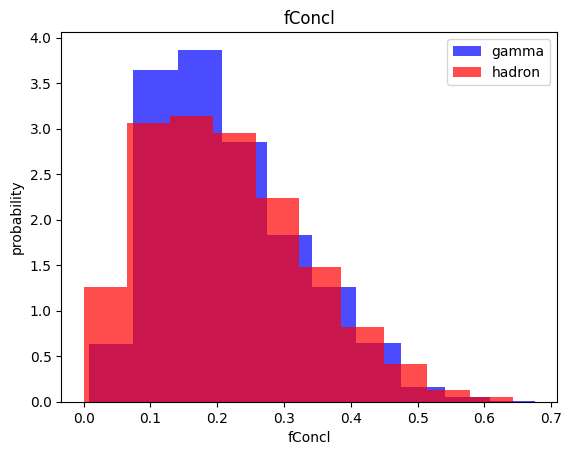

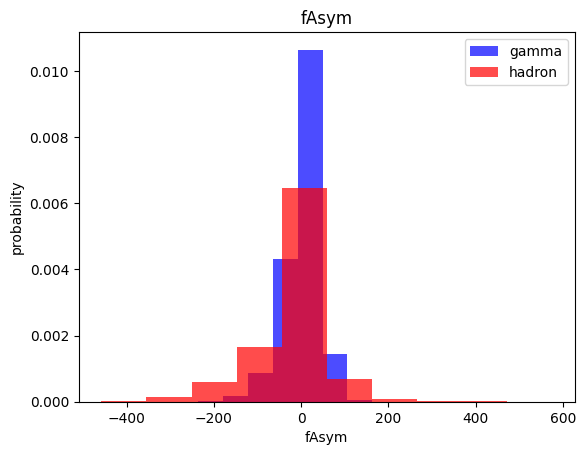

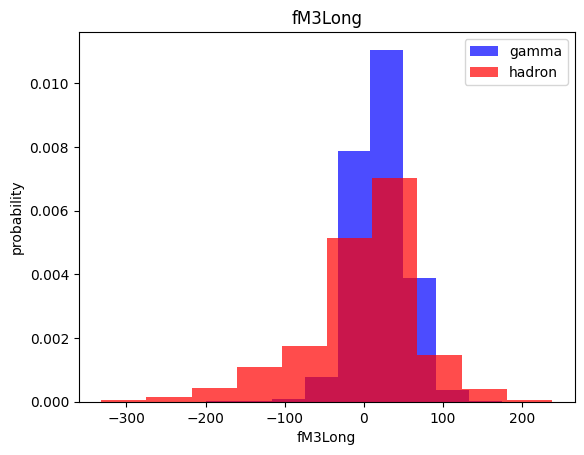

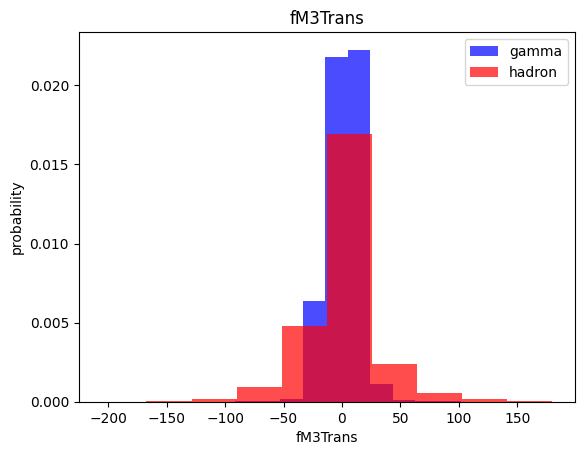

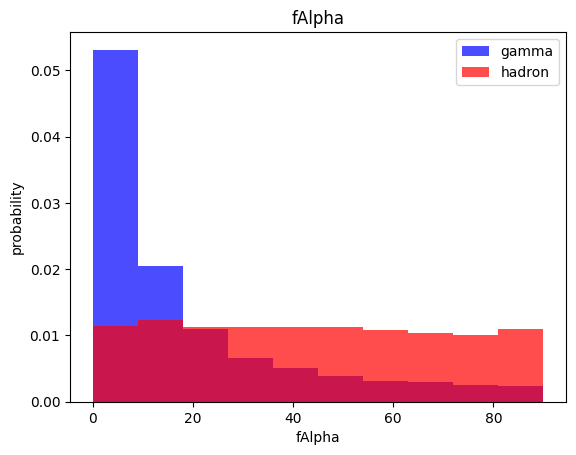

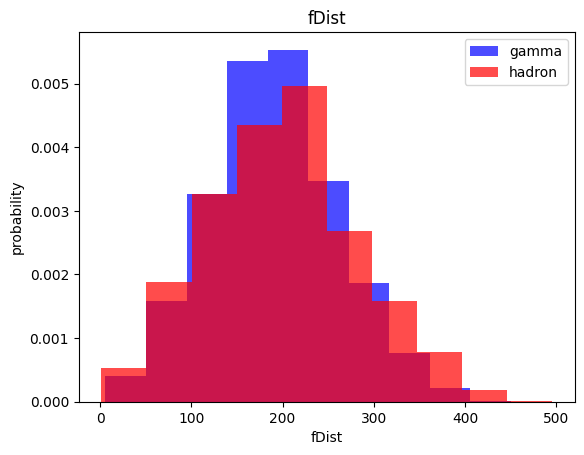

In [12]:
for label in cols[:-1]:
  plt.hist(df[df["class"]== 1][label], color='blue', label='gamma', alpha =0.7, density= True)
  plt.hist(df[df["class"]== 0][label], color='red', label='hadron', alpha =0.7, density= True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#train , validate and test dataset

In [13]:
train , valid , test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data, x, y

In [15]:
train

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
1877,67.4161,33.1921,3.0011,0.2913,0.1820,-28.1251,-40.2365,24.2788,7.4092,300.2430,1
15557,49.7866,26.2582,2.7162,0.2897,0.1486,45.7612,58.3653,-23.4577,42.4042,245.1169,0
3148,23.8241,18.6198,2.4265,0.4195,0.2341,-15.1760,-11.6380,-10.6607,12.2490,95.0414,1
5732,54.2229,22.3161,3.3312,0.1800,0.0921,-4.4633,19.5038,7.0540,7.4935,204.3270,1
451,19.8657,10.7730,2.3324,0.5953,0.3326,-8.0461,17.5656,9.9813,17.9290,53.4503,1
...,...,...,...,...,...,...,...,...,...,...,...
11281,52.7282,29.6996,3.2543,0.1269,0.0643,2.6595,26.0616,-11.0186,8.2437,134.1800,1
6817,23.8449,12.7567,2.4183,0.4771,0.2729,17.5340,16.7979,-6.8923,45.3060,150.8580,1
5578,25.7435,11.5007,2.3936,0.5495,0.2808,13.1792,13.5935,-11.6217,8.9820,181.0260,1
14269,63.3411,27.5287,2.9558,0.3093,0.1677,-65.1749,22.6825,-27.5969,39.6021,302.4128,0


In [16]:
len(train[train["class"] == 1])

7416

In [17]:
len(train[train["class"] == 0])

3996

In [18]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test,  y_test = scale_dataset(test, oversample=False)

In [19]:
len(y_train)

14832

In [20]:
len(x_train)

14832

#KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn_model.predict(x_test)

In [24]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [25]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1346
           1       0.85      0.86      0.85      2458

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [29]:
y_pred = nb_model.predict(x_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.38      0.47      1346
           1       0.72      0.89      0.79      2458

    accuracy                           0.70      3804
   macro avg       0.68      0.63      0.63      3804
weighted avg       0.69      0.70      0.68      3804



#Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [33]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1346
           1       0.84      0.81      0.82      2458

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#Support Vector Machines

In [34]:
from sklearn.svm import SVC

In [35]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [36]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1346
           1       0.89      0.89      0.89      2458

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Net

In [37]:
import tensorflow as tf

In [44]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss' )
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid (True)
  plt.show ()
def plot_accuracy(history) :
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
  plt.xlabel ('Epoch')
  plt.ylabel ('Accuracy')
  plt.legend()
  plt.grid (True)
  plt.show()

In [39]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
history = nn_model.fit(
    x_train, y_train,
    epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

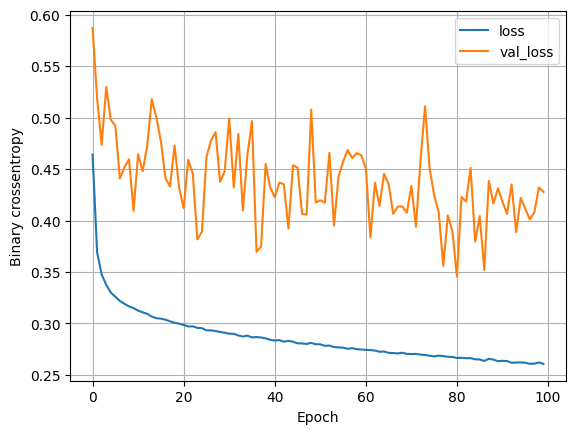

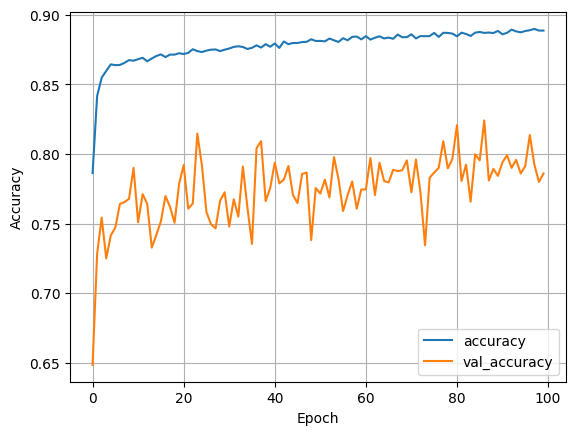

In [45]:
plot_loss(history)
plot_accuracy(history)